In [2]:
from astropy.table import Table, vstack
import glob
import pandas as pd
import numpy as np 
from astropy.time import Time
from astropy.table import Table
from astropy.io import fits
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import time
import random
from scipy.stats import sem
from datetime import datetime, timezone
from matplotlib.patches import Circle
import matplotlib.patches as patches
from matplotlib.patches import RegularPolygon
import numpy as np

In [18]:
random.uniform(-np.pi, np.pi)

-1.1019487120594533

#### LST mirror coordinates

In [3]:
# Define the path to your .dat file
file_path = '/Users/vdk/Downloads/lst-sim-config-sim-telarray-lst-magic-prod2-v1.4/mirror_CTA-N-LST1_v2019-03-31.dat'

# Lists to hold the extracted data from the first two columns
first_column = []
second_column = []

# Open the file and read the data
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into a list of elements based on whitespace
        columns = line.split()
        # Check if the line has enough columns
        if len(columns) >= 2 and line[0] != '#':
            # Append the data from the first two columns to their respective lists
            first_column.append(float(columns[0]))
            second_column.append(float(columns[1]))

# Output the lists
print("First column:", first_column)
print("Second column:", second_column)


First column: [-1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -1022.49, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -889.12, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -755.75, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -622.38, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -489.02, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -355.65, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -222.28, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, -88.91, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 44.46, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82, 177.82

In [19]:
dat = Table.read('/Users/vdk/muons2024/lapalma_simulations/cta-config/fit_valid/muon_table_run1.fits', format='fits')
sum(dat['parameters_at_limit'])

1049

In [4]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['ring_containment'] > 0.9) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
#df_good_data = df_all_data[(df_all_data['ring_containment'] > 0.999) & (df_all_data['size_outside'] < 500)]# & (df_all_data['ring_completeness'] > 0.8)]
del(df_all_data)
df_good_data

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_66483/3448684337.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_66483/3448684337.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_66483/3448684337.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_66483/3448684337.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set

event_id    event_time  mc_energy  ring_size  size_outside  \
0              60.0  1.574637e+09       -1.0  2311.1147      0.000000   
1             287.0  1.574637e+09       -1.0  2646.7896      0.000000   
2             815.0  1.574637e+09       -1.0  2682.9595      0.000000   
3            1248.0  1.574637e+09       -1.0  2802.3580      0.000000   
4            1573.0  1.574637e+09       -1.0  2121.7700      0.000000   
...             ...           ...        ...        ...           ...   
26357608  5052406.0  1.674713e+09       -1.0  2310.4724      0.000000   
26357614  5055159.0  1.674713e+09       -1.0  2182.8315      0.000000   
26357615  5055180.0  1.674713e+09       -1.0  2119.8528     81.346530   
26357616  5056311.0  1.674713e+09       -1.0  1821.9410      6.692784   
26357617  5056827.0  1.674713e+09       -1.0  1638.6548      0.000000   

          ring_center_x  ring_center_y  ring_radius  ring_width good_ring  \
0             -0.975512      -0.354570     1.038939    0.066076       1.0   
1              0.353987       0.463572     1.192394    0.039972       1.0   
2              0.200454       0.503540     1.155244    0.050399       1.0   
3              0.719930       0.076793     1.203815    0.034111       1.0   
4             -0.878445       0.215899     1.024937    0.093730       1.0   
...                 ...            ...          ...         ...       ...   
26357608      -0.211064       0.250784     0.982126    0.048400      True   
26357614       0.045469      -0.660867     1.009607    0.071180      True   
26357615       0.501732       0.109346     0.891445    0.089546      True   
26357616      -0.431301       0.734208     0.981532    0.112360      True   
26357617       0.109289       1.280438     0.990497    0.082953      True   

          ...  impact_parameter  impact_x_array  impact_y_array  radial_stdev  \
0         ...          6.481509        6.331281        1.387386      0.059634   
1         ...          6.638931        0.768292        6.594326      0.042449   
2         ...          5.826689        5.821747       -0.239914      0.049087   
3         ...          4.560473        1.679653        4.239891      0.038754   
4         ...          8.680637       -3.656715       -7.872858      0.077182   
...       ...               ...             ...             ...           ...   
26357608  ...          4.129433        4.031246        0.895138      0.048277   
26357614  ...          5.291778        5.289639       -0.150436      0.062548   
26357615  ...          5.857258        5.855136       -0.157671      0.092540   
26357616  ...          9.194141        5.191974       -7.587862      0.091770   
26357617  ...          9.712586        8.364892       -4.935880      0.067883   

          radial_skewness  radial_excess_kurtosis  num_pixels_in_ring  \
0               -0.111103                0.311915               371.0   
1                0.208130                0.457135               493.0   
2                0.312026                0.410487               478.0   
3                0.229592                0.123887               499.0   
4               -0.073894                0.545917               358.0   
...                   ...                     ...                 ...   
26357608         0.024442               -0.606956               336.0   
26357614        -0.373700                0.266113               353.0   
26357615        -0.898507                0.739353               274.0   
26357616        -0.250212               -0.288611               327.0   
26357617         0.567673                0.067944               317.0   

          mean_pixel_charge_around_ring  hg_peak_sample  lg_peak_sample  
0                              0.039351            13.0             0.0  
1                              0.104818            15.0             0.0  
2                              0.048045            17.0             0.0  
3                              0.371614            19.0        

#### Simulation upload

In [58]:
#listdir1 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0784-reflection/tables/*')
listdir2 = glob.glob('/Users/vdk/muons2024/cscs_simulations/tables_large_lst_muons/*')
listdir3 = glob.glob('/Users/vdk/muons2024/cscs_simulations/muons_zenith0/*')
#listdir4 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0684-reflection/tables/*')
#listdir5 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0884-reflection/tables/*')
listdir7 = glob.glob('/Users/vdk/muons2024/cscs_simulations/narrow_cone/tables/*')
# Muons analyzed using GlobalPeakWindowSum
listdir=listdir2+listdir3+listdir7
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/theta_40_az_180/tables/*')
listdir_z0 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith0/tables_muon/*')
listdir_z0_pt2 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith0/tables/*')
listdir_z10 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/theta_10.0_az_180/tables/*')
listdir_z20 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/0784-reflection/tables/*')
listdir_z30 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/theta_30_az_180/tables/*')
listdir_z40 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/theta_40_az_180/tables/*')

listdir = listdir_z0 + listdir_z0_pt2 + listdir7 + listdir3 + listdir2

listdir_z0_cta1 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/cta-config/fit_valid/tables/*")
listdir_z0_cta2 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/cta-config/tables_pt2/*")

listdir_z0_cta = glob.glob("/Users/vdk/muons2024/lapalma_simulations/cta-config/tables/*")
listdir_z0_cta_fit_valid = glob.glob('/Users/vdk/muons2024/lapalma_simulations/cta-config/fit_valid/tables/*')

listdir_mir_align00125 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/mirror_allignment/random_00125/tables/*')

listdir_fitbound = glob.glob('/Users/vdk/muons2024/lapalma_simulations/fit_play/boundaries0-2pi/tables/*')
listdir_fit_random = glob.glob('/Users/vdk/muons2024/lapalma_simulations/fit_play/fit_random/tables/*')
listdir=listdir_z0_cta1+listdir_z0_cta2

listdir_fit_random_initial_orig = glob.glob("/Users/vdk/muons2024/lapalma_simulations/fit_play/fit_random_initial_orig/tables/*")
listdir_fit_random_initial_guess_minus01 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/fit_play/fit_random_initial_guess_phi_minus01/tables/*")
listdir_fit_random_initial_guess_pina2 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/fit_play/fit_random_initial_guess_phi_pina2/tables/*")

dat = Table.read('{}'.format(listdir_fit_random_initial_guess_minus01[0]), format='fits')
for muon_file in listdir_fit_random_initial_guess_minus01:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat2['is_valid'] = dat2['is_valid'].astype(bool)
    dat2['parameters_at_limit'] = dat2['parameters_at_limit'].astype(bool)
    dat = vstack([dat, dat2])

min_impact = min(df_good_data['impact_parameter'])
max_impact = max(df_good_data['impact_parameter']) 
df = dat.to_pandas()
df_good_sim_data = df[(df['muon_efficiency'] < 1) & 
                      (df['ring_containment'] > 0.9) & 
                      (df['size_outside'] < 500) &
                      (df['impact_parameter'] < max_impact) &
                      (df['impact_parameter'] > min_impact)]
#df_good_data = df_good_data[df_good_data['ring_completeness'] > 0.9]
print(np.mean(df_good_sim_data['muon_efficiency']))
df_good_sim_data

0.1533397442099014


event_id  event_time  mc_energy    ring_size  size_outside  \
6            3100         NaN   0.054666  2238.808594           0.0   
7            3102         NaN   0.054666  2588.655273           0.0   
8            3103         NaN   0.054666  2647.341309           0.0   
9            3104         NaN   0.054666  2179.437988           0.0   
10           3108         NaN   0.054666  2254.821777           0.0   
...           ...         ...        ...          ...           ...   
1223029    991309         NaN   0.010585  2037.835938           0.0   
1223048    995300         NaN   0.059302  2527.641357           0.0   
1223049    995302         NaN   0.059302  2413.234619           0.0   
1223051    995305         NaN   0.059302  2593.211914           0.0   
1223053    995308         NaN   0.059302  2554.517578           0.0   

         ring_center_x  ring_center_y  ring_radius  ring_width  good_ring  \
6            -0.755602       0.511901     1.209431    0.088455       True   
7            -0.742013       0.519429     1.227218    0.047659       True   
8            -0.731703       0.498058     1.214071    0.044957       True   
9            -0.727445       0.492016     1.225159    0.066961       True   
10           -0.758152       0.525826     1.257256    0.049459       True   
...                ...            ...          ...         ...        ...   
1223029      -0.111259       0.468515     1.058410    0.049549       True   
1223048       0.953738      -0.464253     1.211091    0.045884       True   
1223049       0.954441      -0.473837     1.211889    0.062894       True   
1223051       0.943834      -0.467147     1.204962    0.034104       True   
1223053       0.953335      -0.467516     1.208043    0.044642       True   

         ...  impact_y_array  is_valid  parameters_at_limit  radial_stdev  \
6        ...    8.636459e-15      True                 True      0.064939   
7        ...    2.281775e+00      True                False      0.041414   
8        ...   -5.290168e+00      True                False      0.042991   
9        ...    9.340666e+00      True                False      0.054983   
10       ...    5.223766e+00      True                False      0.044458   
...      ...             ...       ...                  ...           ...   
1223029  ...   -1.782031e-01      True                False      0.044832   
1223048  ...    3.717206e+00     False                 True      0.041385   
1223049  ...    4.463981e+00      True                False      0.050048   
1223051  ...   -4.515942e-01      True                False      0.036843   
1223053  ...    3.846265e+00      True                False      0.042617   

         radial_skewness  radial_excess_kurtosis  num_pixels_in_ring  \
6               0.423290               -0.325794                 490   
7               0.025553               -0.672742                 507   
8               0.141434               -0.504107                 502   
9               0.264930               -0.078801                 510   
10              0.443024                0.144349                 514   
...                  ...                     ...                 ...   
1223029        -0.067063               -0.566816                 390   
1223048         0.119981               -0.139717                 455   
1223049         0.549475                0.884681                 456   
1223051         0.047593               -0.132416                 455   
1223053         0.066171                0.220142                 457   

         mean_pixel_charge_around_ring  hg_peak_sample  lg_peak_sample  
6                             1.416586             NaN             NaN  
7                             1.293135             NaN             NaN  
8                             1.136619             NaN             NaN  
9                             1.270221             NaN             NaN  
10                            1.369731             NaN             NaN  
...

In [ ]:
df_good_sim_data

event_id  event_time  mc_energy    ring_size  size_outside  \
6           3100         NaN   0.054666  2238.808594           0.0   
7           3102         NaN   0.054666  2588.655273           0.0   
8           3103         NaN   0.054666  2647.341309           0.0   
14          6900         NaN   0.030234  2224.717773           0.0   
15          6901         NaN   0.030234  2268.047363           0.0   
...          ...         ...        ...          ...           ...   
894312    984607         NaN   0.019301  2563.314209           0.0   
894313    984609         NaN   0.019301  2022.266724           0.0   
894333    991200         NaN   0.010671  1706.962036           0.0   
894335    991205         NaN   0.010671  2135.515137           0.0   
894336    991207         NaN   0.010671  1895.473877           0.0   

        ring_center_x  ring_center_y  ring_radius  ring_width  good_ring  ...  \
6           -0.755602       0.511901     1.209431    0.088477       True  ...   
7           -0.742013       0.519429     1.227218    0.047641       True  ...   
8           -0.731703       0.498058     1.214071    0.044952       True  ...   
14          -0.360371      -0.931128     1.199575    0.110533       True  ...   
15          -0.370320      -0.942822     1.188103    0.087916       True  ...   
...               ...            ...          ...         ...        ...  ...   
894312       0.490969       0.207915     1.163556    0.068937       True  ...   
894313       0.556553       0.202137     1.161772    0.069166       True  ...   
894333       0.708205      -0.326419     0.987888    0.097393       True  ...   
894335       0.646832      -0.164991     1.042880    0.098793       True  ...   
894336       0.653787      -0.217123     1.066638    0.094759       True  ...   

        impact_y_array  is_valid  parameters_at_limit  radial_stdev  \
6            -0.085720      True                 True      0.064939   
7             2.435210      True                False      0.041414   
8            -5.289167      True                False      0.042991   
14            1.884340      True                False      0.074222   
15            0.070634      True                 True      0.062668   
...                ...       ...                  ...           ...   
894312        0.379693      True                False      0.054357   
894313        2.668821      True                False      0.049888   
894333        7.922858      True                False      0.067694   
894335        0.748704      True                False      0.074447   
894336        4.126657      True                False      0.069907   

        radial_skewness  radial_excess_kurtosis  num_pixels_in_ring  \
6              0.423290               -0.325794                 490   
7              0.025553               -0.672742                 507   
8              0.141434               -0.504107                 502   
14             0.294311                0.260331                 463   
15             0.051690                0.267939                 455   
...                 ...                     ...                 ...   
894312        -0.300321               -0.019761                 469   
894313         0.117498               -0.514372                 465   
894333         0.461329               -0.494608                 341   
894335        -0.329010                0.211644                 372   
894336         0.561360               -0.212438                 392   

        mean_pixel_charge_around_ring  hg_peak_sample  lg_peak_sample  
6                            1.416586             NaN             NaN  
7                            1.293135             NaN             NaN  
8                            1.136619             NaN             NaN  
14                           1.178427             NaN             NaN  
15                           1.283256             NaN             NaN  
...                               ...             ...   

In [23]:
number = 7
#cos = abs(df_good_data['impact_x_array'][number]) / df_good_data['impact_parameter'][number] 
cosines = df_good_data['impact_x_array'] / df_good_data['impact_parameter'] 
phi = np.rad2deg(np.arccos(cosines))
phi_cut = phi[:1000000]
max(phi_cut)

180.0

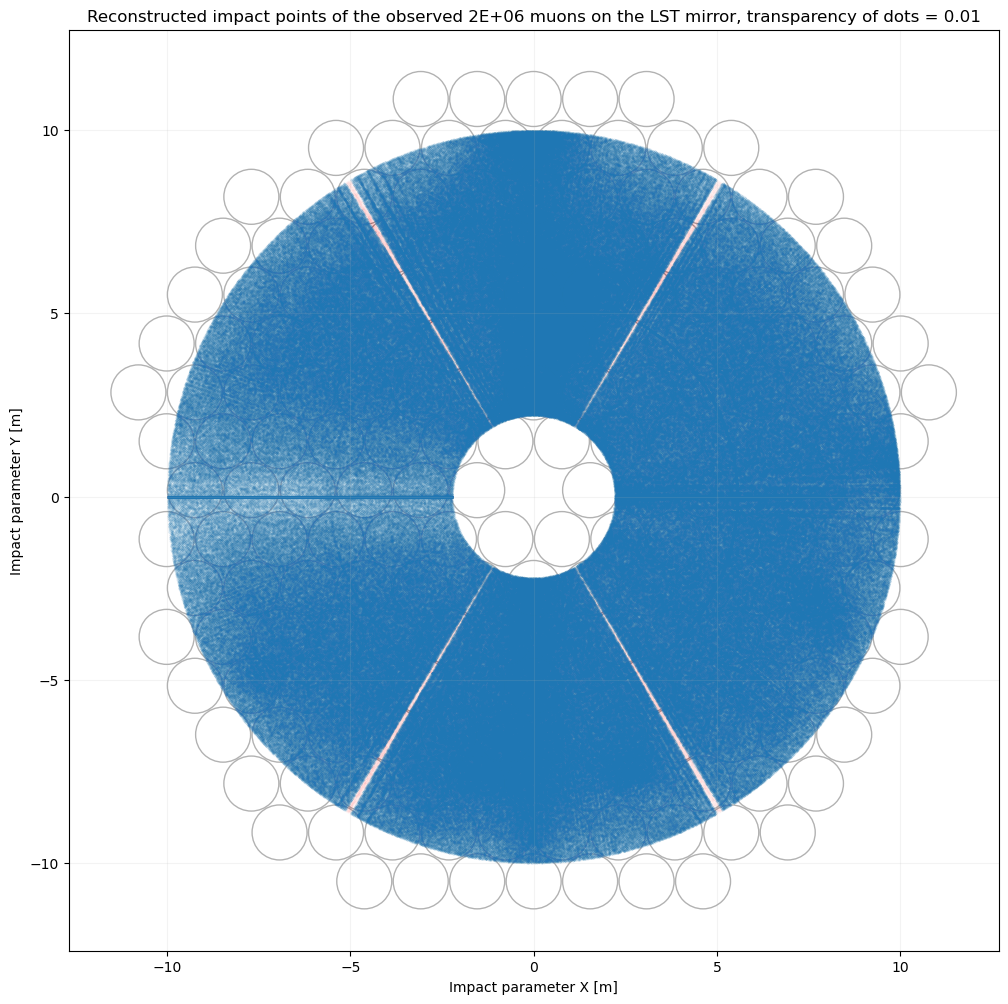

In [26]:
df_good_data_cut = copy.deepcopy(df_good_data[:3000000])
condition = (
    np.rad2deg(
        np.arccos(
            np.abs(df_good_data_cut['impact_x_array']) / df_good_data_cut['impact_parameter']
        )
    ) < 59
) | (
    np.rad2deg(
        np.arccos(
            np.abs(df_good_data_cut['impact_x_array']) / df_good_data_cut['impact_parameter']
        )
    ) > 60
)
sum(condition)
len(df_good_data_cut)-sum(condition)
alpha_value = 0.01
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
#ax.add_patch(circle)
for mirror_x, mirror_y in zip(first_column,second_column):
    circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.3)  # Center at (0.5, 0.5) with radius 0.2
    ax.add_patch(circle)
# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_good_data_cut['impact_x_array'][~condition], df_good_data_cut['impact_y_array'][~condition], alpha = 0.005, s = 1, marker = 'x', c = 'red')
ax.scatter(df_good_data_cut['impact_x_array'][condition], df_good_data_cut['impact_y_array'][condition], alpha = 0.05, s = 1, marker = 'x')

ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the observed {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [24]:
df

event_id  event_time  mc_energy    ring_size  size_outside  \
0           2002         NaN   0.020657  2207.899414           0.0   
1           2003         NaN   0.020657  2206.765625           0.0   
2           2004         NaN   0.020657  2056.440918           0.0   
3           2006         NaN   0.020657  1973.703369           0.0   
4           2600         NaN   0.076046  1433.535645           0.0   
...          ...         ...        ...          ...           ...   
894364    997609         NaN   0.009795  1418.186035           0.0   
894365    998101         NaN   0.014092  1233.184692           0.0   
894366    998900         NaN   0.028332  1177.234741           0.0   
894367    998906         NaN   0.028332  1425.277344           0.0   
894368    998909         NaN   0.028332  1554.763428           0.0   

        ring_center_x  ring_center_y  ring_radius  ring_width  good_ring  ...  \
0           -0.661184       0.966974     1.186668    0.037099       True  ...   
1           -0.673224       0.967293     1.199118    0.043736       True  ...   
2           -0.647568       0.972400     1.162322    0.053321       True  ...   
3           -0.662336       0.958073     1.203193    0.064015       True  ...   
4            1.538796      -0.759323     1.210705    0.058956       True  ...   
...               ...            ...          ...         ...        ...  ...   
894364      -1.945741      -0.117503     1.006374    0.071894       True  ...   
894365      -0.114487       2.466285     1.119629    0.082992      False  ...   
894366       0.553909      -2.105410     1.132560    0.091203       True  ...   
894367       0.589194      -2.232785     1.220804         NaN      False  ...   
894368       0.573913      -2.214222     1.204120         NaN      False  ...   

        impact_y_array  is_valid  parameters_at_limit  radial_stdev  \
0            -1.275316      True                False      0.036742   
1            -3.966314     False                False      0.042251   
2            -1.466294      True                False      0.048683   
3            -7.038825      True                False      0.050325   
4             4.627437      True                False      0.049825   
...                ...       ...                  ...           ...   
894364       -1.809755     False                False      0.055380   
894365        0.003052     False                 True      0.066106   
894366       -0.146344      True                False      0.072229   
894367             NaN     False                 True      0.058161   
894368             NaN     False                 True      0.052239   

        radial_skewness  radial_excess_kurtosis  num_pixels_in_ring  \
0             -0.061629               -0.685217                 415   
1              0.083932               -0.224692                 422   
2              0.259003               -0.442285                 402   
3              0.241969               -0.406109                 429   
4             -0.142753               -0.242796                 276   
...                 ...                     ...                 ...   
894364        -0.322310                0.053727                 199   
894365        -0.927274                0.485488                 156   
894366        -0.160221               -0.639998                 200   
894367        -0.993357                1.083344                 215   
894368        -0.961748                1.703361                 212   

        mean_pixel_charge_around_ring  hg_peak_sample  lg_peak_sample  
0                            1.439685             NaN             NaN  
1                            1.280511             NaN             NaN  
2                            1.258787             NaN             NaN  
3                            1.200914             NaN             NaN  
4                            1.431809             NaN             NaN  
...                               ...             ...   

In [ ]:
cosines_sim = np.arccos(df_good_sim_data['impact_x_array'] / df_good_sim_data['impact_parameter'])

#cosines_sim_cut = np.rad2deg(cosines_sim_cut)
cosines_sim_cut = np.rad2deg(cosines_sim)
cosines_sim_cut

In [27]:
z,x,c = plt.hist(cosines_sim_cut, bins = 40, density=True)
plt.grid(alpha=0.5)

NameError: name 'cosines_sim_cut' is not defined

In [ ]:
len(cosines_sim_cut[(cosines_sim_cut>56)])

In [ ]:
cosines_sim = df_good_sim_data['impact_x_array'][(df_good_sim_data['is_valid']) | (df_good_sim_data['parameters_at_limit'])] / df_good_sim_data['impact_parameter'][(df_good_sim_data['is_valid']) | (df_good_sim_data['parameters_at_limit'])]
cosines_sim_cut = cosines_sim[:1000000]
cosines_sim_cut = np.rad2deg(cosines_sim_cut)
min(cosines_sim_cut)

In [ ]:
z,x,c = plt.hist(cosines_sim_cut, bins = 40, density=True)
plt.grid(alpha=0.5)

In [ ]:
condition = (np.rad2deg(np.arccos((abs(df_good_sim_data['impact_x_array']) / df_good_sim_data['impact_parameter']))) < 56)
without_problems = df_good_sim_data[condition]

In [ ]:
without_problems

### All observed muons

In [ ]:
low_limit = 0
upper_limit = len(df_good_data['impact_parameter'])
alpha_value = 1
fig, ax = plt.subplots(figsize=(9,9))
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
#ax.add_patch(circle)


ax.scatter(df_good_data['impact_x_array'][:upper_limit], df_good_data['impact_y_array'][:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the observed {(upper_limit-low_limit):.3E} muons on the LST mirror")#, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.15, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
ax.set_aspect('equal')
#ax.legend(handles, labels)
#plt.savefig(f'/Users/vdk/muons2024/images/ZenithImpactStudy/ImpactPoints_AllYears_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

### Less number of observed muons

In [ ]:
low_limit = 6000000 #(7*1353641)
upper_limit = 100000000 #(8*1353641)
alpha_value = 0.002
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
#ax.add_patch(circle)

x = df_good_data['impact_x_array'][df_good_data['ring_completeness'] > 0][low_limit:upper_limit]
y = df_good_data['impact_y_array'][df_good_data['ring_completeness'] > 0][low_limit:upper_limit]
# Add the circle to the Axes


# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(x, y, alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of observed {(upper_limit-low_limit):.0E} the muons on the LST mirror") #, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#ax.legend(handles, labels)
plt.savefig(f'/Users/vdk/muons2024/images/ImpactPoints_{(low_limit)}to{(upper_limit)}muons_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

#### Play with different dates

In [ ]:
start_date = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
x_arr = df_good_data['impact_x_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]
y_arr = df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]
print(f"Number of points = {len(x_arr)}")
alpha_value = 0.007
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

ax.scatter(x_arr, y_arr, alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
#ax.set_title(f"Reconstructed impact points of observed {(upper_limit-low_limit):.0E} the muons on the LST mirror, transparency of dots = 1")

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#plt.savefig(f'/Users/vdk/muons2024/images/TimeImpactStudy/ImpactPoints_{len(x_arr)}muons_2021year_Alpha{alpha_value}.png', dpi=100, format='png', bbox_inches='tight')
plt.xticks(np.arange(-11, 11, 0.5), fontsize = 6)  # Adjust the 0.5 to make it denser or less dense
plt.yticks(np.arange(-11, 11, 0.5)) 
plt.grid(alpha=0.75)
#plt.show()

In [ ]:
xmin, xmax = 6.5, 8
ymin, ymax = -5.5, -4

# Define conditions
condition_x = (x_arr >= xmin) & (x_arr <= xmax)
condition_y = (y_arr >= ymin) & (y_arr <= ymax)

# Combine conditions
combined_condition = condition_x & condition_y

# Filter indices
filtered_indices = x_arr[combined_condition].index

# Print the filtered indices
print(len(filtered_indices))

In [ ]:
114148/4

In [ ]:
5723499/(np.pi*(10**2) - np.pi*(2)**2)

In [ ]:
28537/18977.565783989998

In [ ]:
60493/2.25

In [ ]:
(85636/4)/18977.565783989998

In [ ]:
114148/85636

In [ ]:
xmin, xmax = -8, -6.5
ymin, ymax = -5.5, -4

# Define conditions
condition_x = (x_arr >= xmin) & (x_arr <= xmax)
condition_y = (y_arr >= ymin) & (y_arr <= ymax)

# Combine conditions
combined_condition = condition_x & condition_y

# Filter indices
filtered_indices = x_arr[combined_condition].index

# Print the filtered indices
print(len(filtered_indices))

In [ ]:
(1/np.tan(np.deg2rad(1.2))) * 0.85


Number of points = 7178497


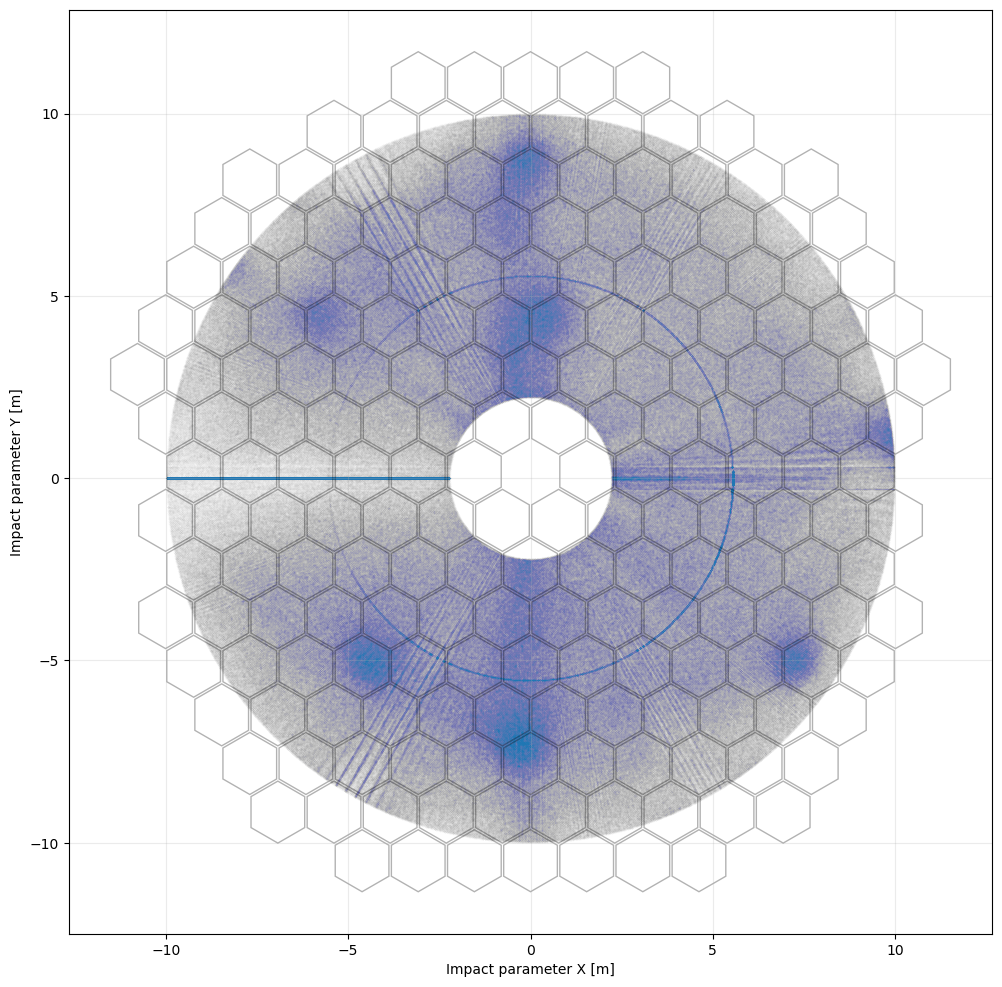

In [28]:
start_date = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
x_arr = df_good_data['impact_x_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]
y_arr = df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]
print(f"Number of points = {len(x_arr)}")
alpha_value = 0.005
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

ax.scatter(x_arr, y_arr, alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
#ax.set_title(f"Reconstructed impact points of observed {(upper_limit-low_limit):.0E} the muons on the LST mirror, transparency of dots = 1")

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#plt.savefig(f'/Users/vdk/muons2024/images//ImpactPoints_{len(x_arr)}muons_2023year_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
# plt.xticks(np.arange(-11, 11, 0.5), fontsize = 7)  # Adjust the 0.5 to make it denser or less dense
# plt.yticks(np.arange(-11, 11, 0.5)) 
plt.grid(alpha=0.25)
#plt.show()

In [ ]:
plt.figure(figsize=(12,4))
z,x,c = plt.hist(df_good_data['impact_x_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)], bins = 100, alpha = 0.8, density=True)
plt.xlim(-12.5,12.5)
plt.grid(alpha = 0.7)

In [ ]:
start_date = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
x_arr = df_good_data['impact_x_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]
y_arr = df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)]

alpha_value = 0.02
fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

ax.scatter(x_arr, y_arr, alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
#ax.set_title(f"Reconstructed impact points of observed {(upper_limit-low_limit):.0E} the muons on the LST mirror, transparency of dots = 1")

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#plt.savefig(f'/Users/vdk/muons2024/images/ZenithImpactStudy/ImpactPoints_{(low_limit)}to{(upper_limit)}muons_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
df_good_sim_data.columns

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'is_valid',
       'parameters_at_limit', 'radial_stdev', 'radial_skewness',
       'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample'],
      dtype='object')

### Simulated muons

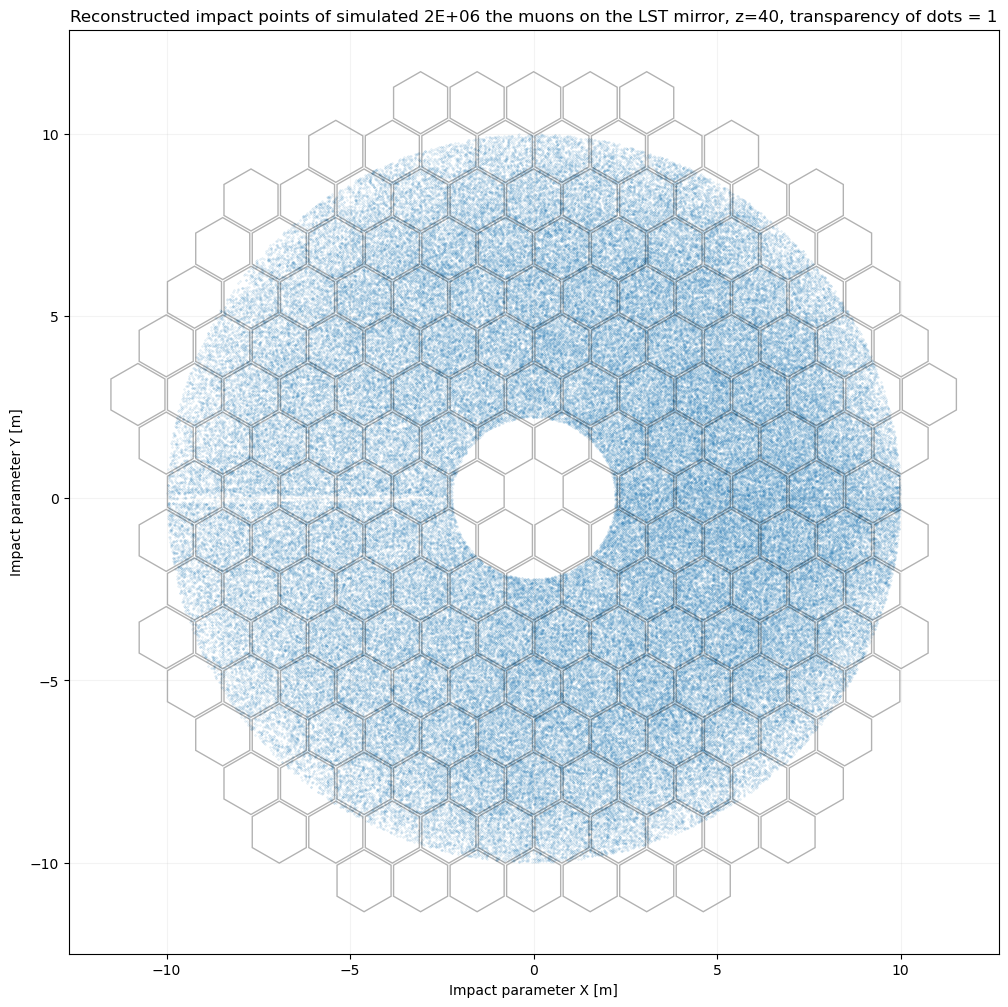

In [72]:
low_limit = 0
upper_limit = 2000000
alpha_value = 0.1
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
# circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
# ax.add_patch(circle)
# ax.set_aspect('equal')


ax.scatter(df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']], df_good_sim_data['impact_y_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']], alpha = alpha_value, s = 1, marker = 'x')
#ax.scatter(without_problems['impact_x_array'], without_problems['impact_y_array'][:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of simulated {(upper_limit-low_limit):.0E} the muons on the LST mirror, z=40, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#ax.legend(handles, labels)
#plt.savefig(f'/Users/vdk/muons2024/images/ZenithImpactStudy/SimImpactPoints_1e6muons_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

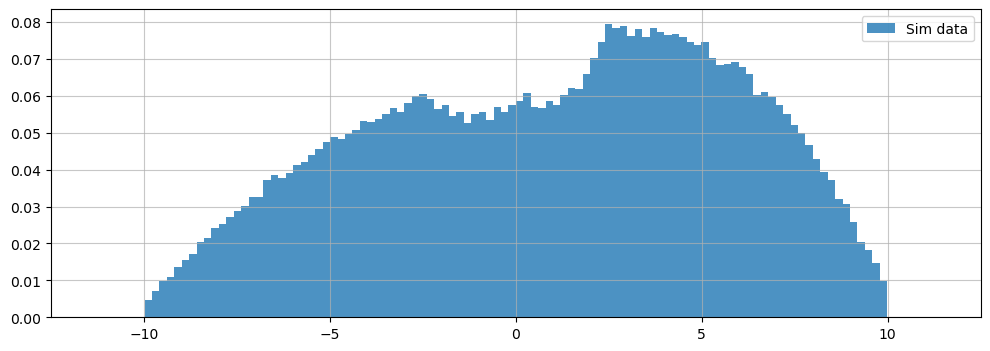

In [73]:
plt.figure(figsize=(12,4))
z,x,c = plt.hist(df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']],  bins = 100, alpha = 0.8, density=True, label = 'Sim data')
#z,x,c = plt.hist(df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)], bins = 100, alpha = 0.8, density=True,label = 'Obs data')
plt.legend()
plt.xlim(-12.5,12.5)
plt.grid(alpha = 0.7)

In [69]:
len(df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']])

222950

In [ ]:
df_good_data

In [ ]:
len(df_good_sim_data)

701976

### Lets play now with transparency of a dots

#### Simulated data

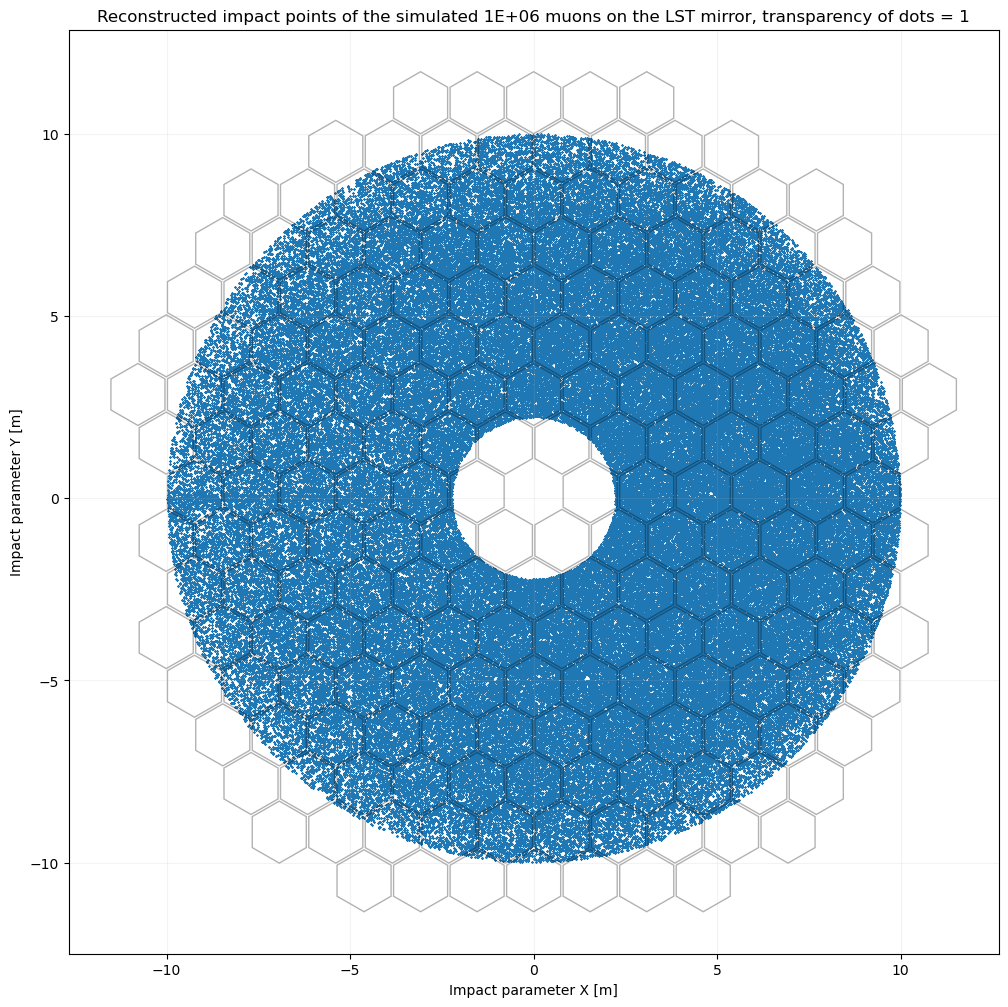

In [30]:
low_limit = 0
upper_limit = len(df_good_sim_data)
alpha_value = 1
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
# circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
# ax.add_patch(circle)
# # Set the aspect of the plot to equal to make sure the circle is not oval
# ax.set_aspect('equal')

#ax.scatter(df_good_sim_data['impact_x_array'][low_limit:upper_limit], df_good_sim_data['impact_y_array'][low_limit:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
#ax.scatter(df_good_sim_data['impact_x_array'][(df_good_sim_data['is_valid']) | (~df_good_sim_data['parameters_at_limit'])], df_good_sim_data['impact_y_array'][(df_good_sim_data['is_valid']) | (~df_good_sim_data['parameters_at_limit'])], alpha = alpha_value, s = 1, marker = 'x')
ax.scatter(df_good_sim_data['impact_x_array'][(~df_good_sim_data['parameters_at_limit'])], df_good_sim_data['impact_y_array'][(~df_good_sim_data['parameters_at_limit'])], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
#ax.set_title(f"Reconstructed impact points of the simulated {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")#
ax.set_title(f"Reconstructed impact points of the simulated {(upper_limit-low_limit):.2E} muons on the LST mirror, transparency of dots = {alpha_value}")
ax.set_title(f"Reconstructed impact points of the simulated 1E+06 muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.3, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)
#ax.legend(handles, labels)
#plt.savefig(f'/Users/vdk/muons2024/images/SimImpactPoints_NoParamLimit_zenith0_Alpha{alpha_value}.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

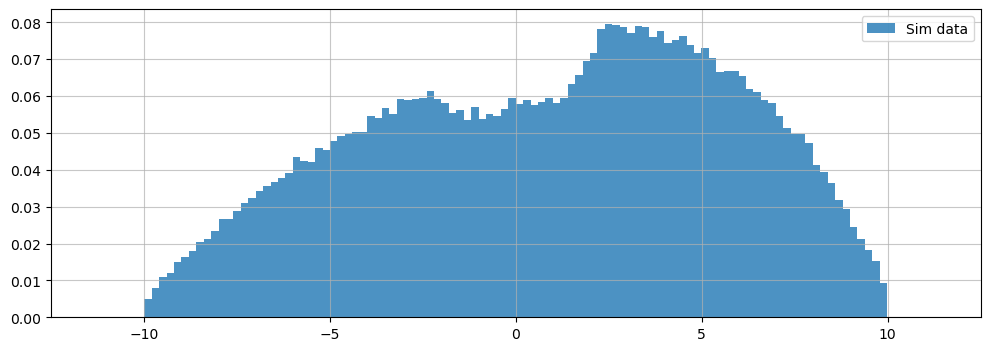

In [33]:
plt.figure(figsize=(12,4))
#z,x,c = plt.hist(df_good_sim_data['impact_x_array'][(df_good_sim_data['is_valid']) & (~df_good_sim_data['parameters_at_limit'])],  bins = 100, alpha = 0.8, density=True, label = 'Sim data')
z,x,c = plt.hist(df_good_sim_data['impact_x_array'][(~df_good_sim_data['parameters_at_limit'])],  bins = 100, alpha = 0.8, density=True, label = 'Sim data')
#z,x,c = plt.hist(df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)], bins = 100, alpha = 0.8, density=True,label = 'Obs data')
plt.legend()
plt.xlim(-12.5,12.5)
plt.grid(alpha = 0.7)

In [ ]:
plt.figure(figsize=(12,4))
#z,x,c = plt.hist(df_good_sim_data['impact_x_array'][(df_good_sim_data['is_valid']) & (~df_good_sim_data['parameters_at_limit'])],  bins = 100, alpha = 0.8, density=True, label = 'Sim data')
z,x,c = plt.hist(df_good_sim_data['impact_x_array'][(~df_good_sim_data['parameters_at_limit'])],  bins = 100, alpha = 0.8, density=True, label = 'Sim data')
#z,x,c = plt.hist(df_good_data['impact_y_array'][(df_good_data['event_time'] > start_date) & (df_good_data['event_time'] < end_date)], bins = 100, alpha = 0.8, density=True,label = 'Obs data')
plt.legend()
plt.xlim(-12.5,12.5)
plt.grid(alpha = 0.7)

### Percentage of unvalid events

In [ ]:
len(df_good_sim_data['impact_x_array'][(~df_good_sim_data['is_valid']) | (df_good_sim_data['parameters_at_limit'])])/len(df_good_sim_data['impact_x_array'])

### Optical efficiency in the invalid events

In [ ]:
np.mean(df_good_sim_data['muon_efficiency'][(df_good_sim_data['is_valid']) & (~df_good_sim_data['parameters_at_limit'])])
#np.mean(df_good_sim_data['muon_efficiency'])
len(df_good_sim_data['muon_efficiency'])
len(df_good_sim_data['muon_efficiency'][(df_good_sim_data['is_valid']) & (~df_good_sim_data['parameters_at_limit'])])
#len(df_good_sim_data['muon_efficiency'][(~df_good_sim_data['is_valid']) | (df_good_sim_data['parameters_at_limit'])])

#### Observaed data

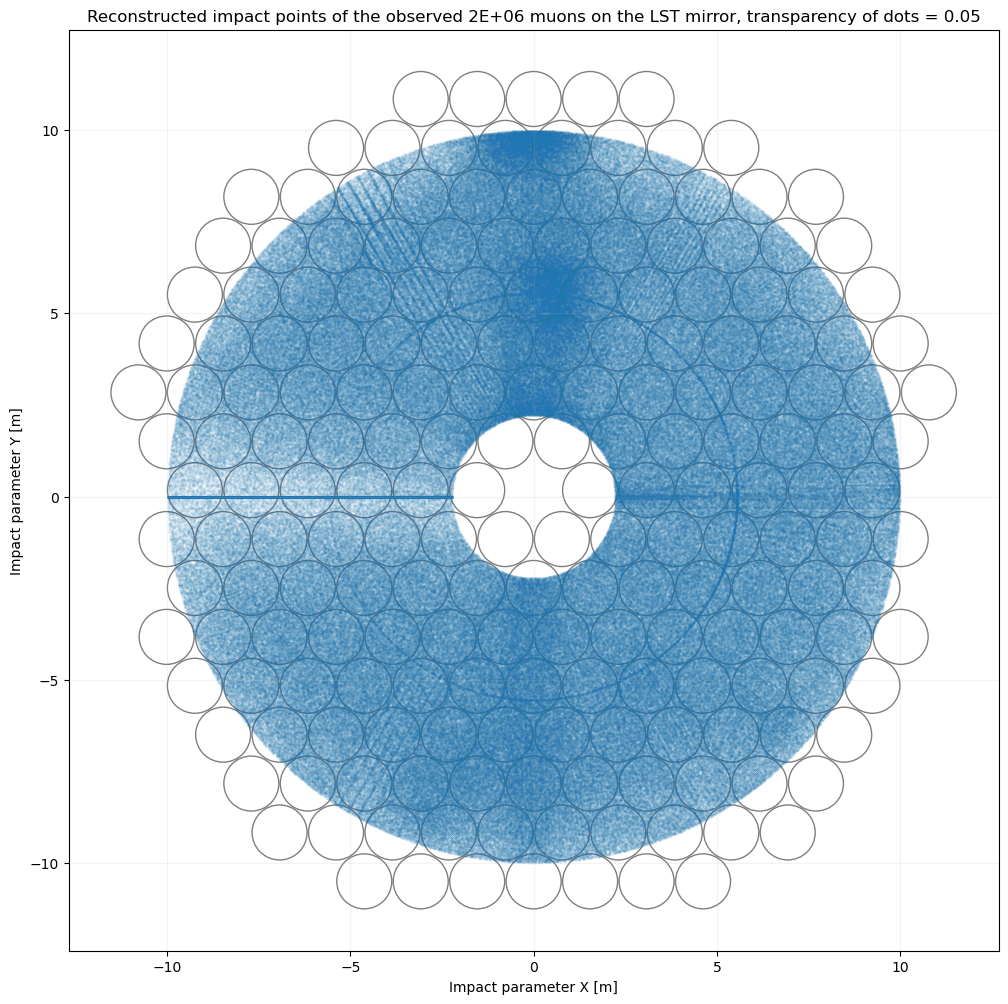

In [ ]:
low_limit = 0
upper_limit = 1500000
alpha_value = 0.05
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
#circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
#ax.add_patch(circle)
for mirror_x, mirror_y in zip(first_column,second_column):
    circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.5)  # Center at (0.5, 0.5) with radius 0.2
    ax.add_patch(circle)
# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_good_data['impact_x_array'][low_limit:upper_limit], df_good_data['impact_y_array'][low_limit:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the observed {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
df_to_check = df_good_data[low_limit:upper_limit]
df_to_check_sim = df_good_sim_data[low_limit:upper_limit]
stain_muons = df_to_check[
    (df_to_check['impact_y_array'] > 0) & 
    (df_to_check['impact_y_array'] < 10) & 
    (df_to_check['impact_x_array'] > -2) & 
    (df_to_check['impact_x_array'] < 2)
]
regular_muons = df_to_check[
    (df_to_check['impact_y_array'] > -2) & 
    (df_to_check['impact_y_array'] < 2) & 
    (df_to_check['impact_x_array'] > 0) & 
    (df_to_check['impact_x_array'] < 10)
]
sim_muons = df_to_check_sim[
    (df_to_check_sim['impact_y_array'] > -2) & 
    (df_to_check_sim['impact_y_array'] < 2) & 
    (df_to_check_sim['impact_x_array'] > 0) & 
    (df_to_check_sim['impact_x_array'] < 10)
]
print(f"Number of muons in the more dense region = {len(stain_muons)}")
print(f"Number of muons in the region of lower density {len(regular_muons)}")
print(f"Number of muons in the same region in simulations {len(sim_muons)}")

In [ ]:
min(df_good_sim_data['impact_parameter'])

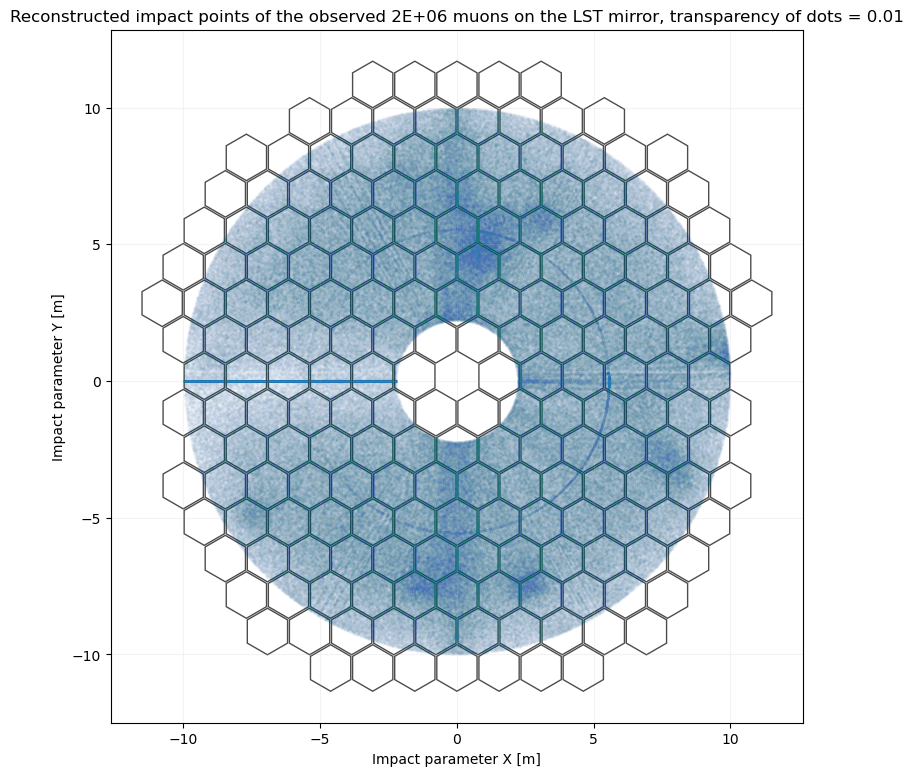

In [ ]:


low_limit = 1500000
upper_limit = 3000000
alpha_value = 0.01
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(9,9))
# Create a circle patch
# circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2
# ax.add_patch(circle)



# def hexagon(center_x, center_y, radius):
#     """ Generate the vertices of a hexagon given center and radius """
#     angle = np.linspace(0, 2 * np.pi, 7)
#     x_hexagon = center_x + radius * np.sin(angle)
#     y_hexagon = center_y + radius * np.cos(angle)
#     return x_hexagon, y_hexagon
# x_hexagons=[]
# y_hexagons=[]
# # Plotting hexagons
# for center_x, center_y in zip(first_column, second_column):
#     x_hexagon, y_hexagon = hexagon(center_x*0.01, center_y*0.01, 0.75)
#     print(center_x, x_hexagon)
#     print(center_y, y_hexagon)
#     hex_patch = patches.Polygon(np.column_stack([x_hexagon, y_hexagon]), closed=True, edgecolor='r', facecolor='none')
#     ax.add_patch(hex_patch)

for center_x, center_y in zip(first_column, second_column):
    hex = RegularPolygon((center_y*0.01, center_x*0.01-0.269), numVertices=6, radius=0.85, alpha=0.7, edgecolor='k', fill=False)
    ax.add_patch(hex)
plt.autoscale(enable = True)

# for mirror_x, mirror_y in zip(first_column,second_column):
#     circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.5)  # Center at (0.5, 0.5) with radius 0.2
#     ax.add_patch(circle)
# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_good_data['impact_x_array'][low_limit:upper_limit], df_good_data['impact_y_array'][low_limit:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the observed {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
np.column_stack([x_hexagon, y_hexagon])

In [ ]:
# So, how much impact points we expect in one square element
N = 1500000
S1 = np.pi * (max(df_good_data['impact_parameter']))**2
S2 = np.pi * (min(df_good_data['impact_parameter']))**2
S = S1 - S2
print(f"We expect to have '{round(N/S,1)}' muons per area unit")

In [ ]:
# So, how much impact points we expect in one square element
N = 1500000
S1 = np.pi * (max(df_good_data['impact_parameter']))**2
S2 = np.pi * (min(df_good_data['impact_parameter']))**2
S = S1 - S2
df_to_check = df_good_data[low_limit:upper_limit]
stain_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 1) & 
    (df_to_check['impact_x_array'] < 4)
]
regular_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] < -3) & 
    (df_to_check['impact_x_array'] > -6)
]
print(f"Number of muons in the more dense region = {len(stain_muons)/(3*3)}")
print(f"Number of muons in the region of lower density {len(regular_muons)/(3*3)}")
print(f"We expect to have '{round(N/S,1)}' muons per area unit")


In [ ]:
stain_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 1) & 
    (df_to_check['impact_x_array'] < 4)
]

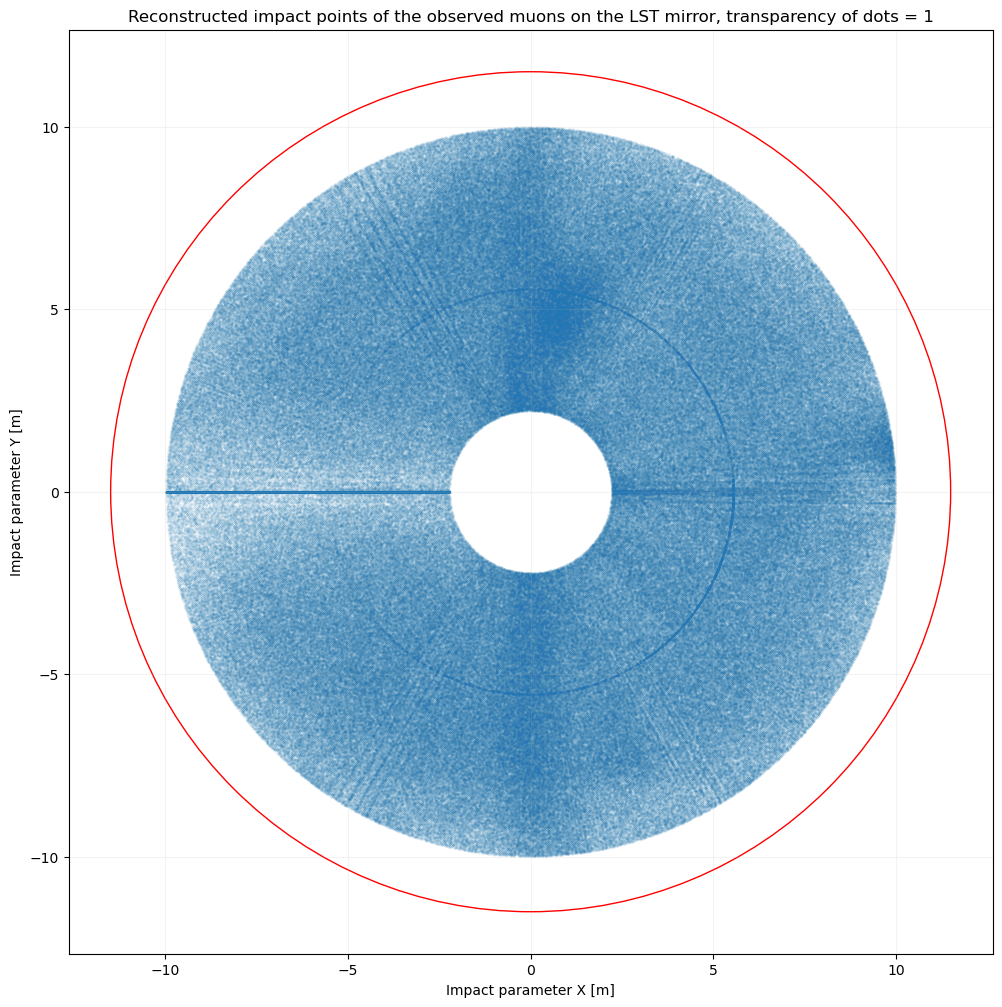

In [34]:
low_limit = 3000000
upper_limit = 4500000
alpha_value = 0.05
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2

# Add the circle to the Axes
ax.add_patch(circle)

# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_good_data['impact_x_array'][low_limit:upper_limit], df_good_data['impact_y_array'][low_limit:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title("Reconstructed impact points of the observed muons on the LST mirror, transparency of dots = 1")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
plt.grid(alpha=0.15)
plt.show()

In [ ]:
df_to_check = df_good_data[5000000:6000000]
df_to_check[(df_to_check['impact_y_array'] > -10) & (df_to_check['impact_y_array'] < -7) & (df_to_check['impact_x_array'] > 0) & (df_to_check['impact_x_array'] < 4)]

In [ ]:
df_to_check[(df_to_check['impact_y_array'] > -10) & (df_to_check['impact_y_array'] < -7) & (df_to_check['impact_x_array'] < 0) & (df_to_check['impact_x_array'] > -4)]

In [ ]:
df_to_check = df_good_data[5000000:6000000]
df_to_check[(df_to_check['impact_y_array'] > -10) & (df_to_check['impact_y_array'] < -7) & (df_to_check['impact_x_array'] > 0) & (df_to_check['impact_x_array'] < 4)]

### Sorted by event time

In [ ]:
df_sorted = df_good_data.sort_values(by='event_time', ascending=True)

In [ ]:
low_limit = 1700000
upper_limit = 1900000
alpha_value = 0.2
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
# circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')  # Center at (0.5, 0.5) with radius 0.2

# # Add the circle to the Axes
# ax.add_patch(circle)
for mirror_x, mirror_y in zip(first_column,second_column):
    circle = Circle((mirror_y*0.01, (mirror_x*0.01-0.269)), 0.75, color='k', fill=False, alpha = 0.5)  # Center at (0.5, 0.5) with radius 0.2
    ax.add_patch(circle)

# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_sorted['impact_x_array'][low_limit:upper_limit], df_sorted['impact_y_array'][low_limit:upper_limit], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the observed {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
print(f"Start date {datetime.fromtimestamp(min(df_sorted['event_time'][low_limit:upper_limit])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"End date {datetime.fromtimestamp(max(df_sorted['event_time'][low_limit:upper_limit])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
#plt.grid(alpha=0.15)
plt.grid(alpha=1)
plt.show()

In [ ]:
low_limit = 1700000
upper_limit = 1900000
alpha_value = 0.1
# Create a new figure and an axes instance
fig, ax = plt.subplots(figsize=(12,12))
# Create a circle patch
circle = Circle((0, 0), 11.5, color='red', fill=False, label = 'LST1 full mirror')

# Add the circle to the Axes
ax.add_patch(circle)

# Set the aspect of the plot to equal to make sure the circle is not oval
ax.set_aspect('equal')

ax.scatter(df_to_check_sim['impact_x_array'], df_to_check_sim['impact_y_array'], alpha = alpha_value, s = 1, marker = 'x')
ax.set_xlabel("Impact parameter X [m]")
ax.set_ylabel("Impact parameter Y [m]")
ax.set_title(f"Reconstructed impact points of the simulated {(upper_limit-low_limit):.0E} muons on the LST mirror, transparency of dots = {alpha_value}")
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#plt.savefig('/Users/vdk/muons2024/images/ImpactPoints_19-23Y_Alpha1.png', dpi=200, format='png', bbox_inches='tight')
print(f"Start date {datetime.fromtimestamp(min(df_sorted['event_time'][low_limit:upper_limit])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"End date {datetime.fromtimestamp(max(df_sorted['event_time'][low_limit:upper_limit])).strftime('%Y-%m-%d %H:%M:%S.%f')}")
plt.grid(alpha=0.15)
plt.show()

In [ ]:
df_to_check = df_sorted[low_limit:upper_limit]
df_to_check_sim = df_good_sim_data[1200000:1400000]
stain_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 1) & 
    (df_to_check['impact_x_array'] < 4)
]
regular_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] < -3) & 
    (df_to_check['impact_x_array'] > -6)
]
sim_muons = df_to_check_sim[
    (df_to_check_sim['impact_y_array'] > -9) & 
    (df_to_check_sim['impact_y_array'] < -6) & 
    (df_to_check_sim['impact_x_array'] < -3) & 
    (df_to_check_sim['impact_x_array'] > -6)
]
print(f"Number of muons in the more dense region = {len(stain_muons)}")
print(f"Number of muons in the region of lower density {len(regular_muons)}")
print(f"Number of muons in the same region in simulations {len(sim_muons)}")

In [ ]:
df_to_check = df_sorted[low_limit:upper_limit]
df_to_check_sim = df_good_sim_data[1200000:1400000]
stain_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 1) & 
    (df_to_check['impact_x_array'] < 4)
]
regular_muons = df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 3) & 
    (df_to_check['impact_x_array'] < 5)
]
sim_muons = df_to_check_sim[
    (df_to_check_sim['impact_y_array'] > -9) & 
    (df_to_check_sim['impact_y_array'] < -6) & 
    (df_to_check_sim['impact_x_array'] > 1) & 
    (df_to_check_sim['impact_x_array'] < 4)
]
print(f"Number of muons in the more dense region = {len(stain_muons)}")
print(f"Number of muons in the region of lower density {len(regular_muons)}")
print(f"Number of muons in the same region in simulations {len(sim_muons)}")

In [ ]:
df_to_check = df_sorted[low_limit:upper_limit]
df_to_check[
    (df_to_check['impact_y_array'] > -9) & 
    (df_to_check['impact_y_array'] < -6) & 
    (df_to_check['impact_x_array'] > 3) & 
    (df_to_check['impact_x_array'] < 5)
]

### Heatmap

In [43]:
# Assuming muon_centers and mirrors_centers are numpy arrays of shape (N, 2) for 2D coordinates
# Replace with your actual data


# Initialize the mirror_numbers array


# Vectorize distance calculations
for muon in muon_centers:
    # Calculate distances from the current muon to all mirrors
    distances = np.linalg.norm(mirrors_centers - muon, axis=2)
    
    # Find the index of the closest mirror
    closest_mirror_index = np.argmin(distances)
    
    # Increment the count for the closest mirror
    mirror_numbers[closest_mirror_index] += 1

print(mirror_numbers)


ValueError: operands could not be broadcast together with shapes (2,198) (226834,) 

In [59]:
muon_centers_full = np.vstack((df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit']], df_good_sim_data['impact_y_array'][~df_good_sim_data['parameters_at_limit']]))
mirrors_centers_full = np.vstack((first_column, second_column))

# Assuming muon_centers and mirrors_centers are numpy arrays of shape (N, 2) for 2D coordinates
# Replace with your actual data
muon_centers = np.random.rand(198, 2)  # Example data
mirrors_centers = np.random.rand(15000, 2)  # Example data

(222950, 2)
(198, 2)


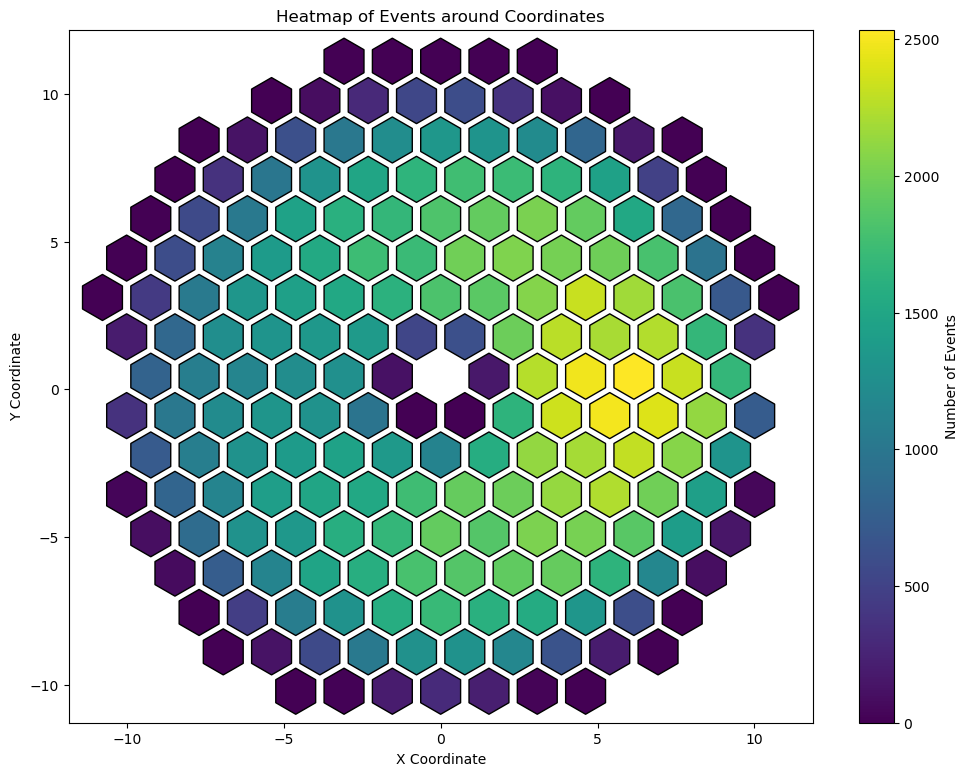

In [74]:
mirror_numbers = np.zeros(len(mirrors_centers), dtype=int)
muon_centers = np.vstack((df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']], df_good_sim_data['impact_y_array'][~df_good_sim_data['parameters_at_limit'] & df_good_sim_data['is_valid']])).T
#muon_centers = np.vstack((df_good_sim_data['impact_x_array'][df_good_sim_data['is_valid']], df_good_sim_data['impact_y_array'][df_good_sim_data['is_valid']])).T
#muon_centers = np.vstack((df_good_sim_data['impact_x_array'][~df_good_sim_data['is_valid']], df_good_sim_data['impact_y_array'][~df_good_sim_data['is_valid']])).T
#muon_centers = np.vstack((df_good_sim_data['impact_x_array'][~df_good_sim_data['parameters_at_limit']], df_good_sim_data['impact_y_array'][~df_good_sim_data['parameters_at_limit']])).T

mirrors_centers = np.vstack((np.array(second_column)*0.01, np.array(first_column)*0.01)).T

print(muon_centers.shape)
print(mirrors_centers.shape)
# Initialize the mirror_numbers array
mirror_numbers = np.zeros(len(mirrors_centers), dtype=int)

# Vectorize distance calculations
for muon in muon_centers:
    # Calculate distances from the current muon to all mirrors
    distances = np.linalg.norm(mirrors_centers - muon, axis=1)
    
    # Find the index of the closest mirror
    closest_mirror_index = np.argmin(distances)
    
    # Increment the count for the closest mirror
    mirror_numbers[closest_mirror_index] += 1

#print(mirror_numbers)
# Separate the coordinates into x and y lists
x, y = zip(*mirrors_centers)

# Create the scatter plot
plt.figure(figsize=(12, 9))
scatter = plt.scatter(x, y, c=mirror_numbers, cmap='viridis', s=1100, edgecolor='k', marker = 'h')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Events')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Events around Coordinates')

# Show the plot
plt.show()


(15402880, 2)
(198, 2)
[     0   1830  14013  27366  15874   2219      0      0  14347  59988
  80597 102888 106591  98286  56623  12812      0    186  52703  92420
 108725 132977 167358 123269 107840  83243  50602    197   6817  73958
 102961 125625 132764 162401 142855 124623 110669  99101  82513   7705
   8963  83074 109099 148220 135030 136005 157034 128516 121737 116320
 116220 106895   9813   2818  75285 105129 115994 125398 123043 144781
 139815 117302 122662 114717 111700  84400   3451  46351  80145  92448
 103913 107505 105009  84177 105666 121122 122063 111592 100797  65044
  15530  43930  55663  67212  74589  58328      0      0  86450 111702
 123093 111272  89082  32613  69453  82867  90106 101074 104301   8770
  10494 127092 123306 131385 118355 110017  17893  61664  76117  85756
  89091  99424  47242  41760 109144 106711 109917 110075 111801  45514
      0  43549  87456 109899 112933 110238 124592 164878 111556 105649
 109478 108280 100947  53810      0      0  60517 1057

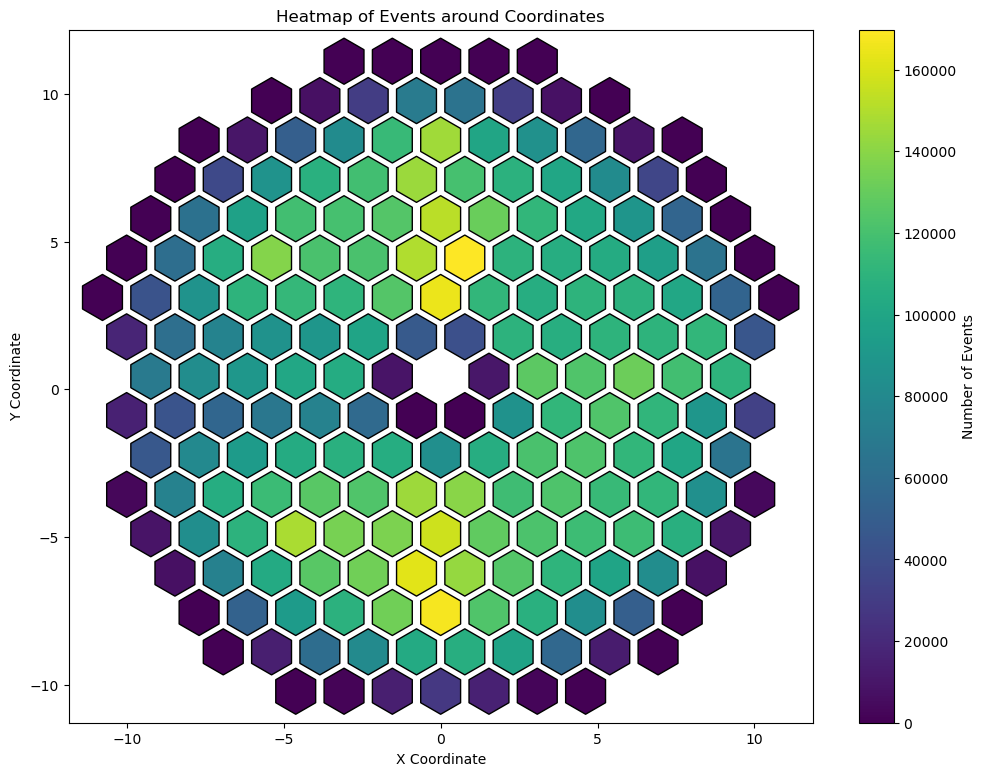

In [86]:
mirror_numbers = np.zeros(len(mirrors_centers), dtype=int)
muon_centers = np.vstack((df_good_data['impact_x_array'], df_good_data['impact_y_array'])).T
mirrors_centers = np.vstack((np.array(second_column)*0.01, np.array(first_column)*0.01)).T

print(muon_centers.shape)
print(mirrors_centers.shape)
# Initialize the mirror_numbers array
mirror_numbers = np.zeros(len(mirrors_centers), dtype=int)

# Vectorize distance calculations
for muon in muon_centers:
    # Calculate distances from the current muon to all mirrors
    distances = np.linalg.norm(mirrors_centers - muon, axis=1)
    
    # Find the index of the closest mirror
    closest_mirror_index = np.argmin(distances)
    
    # Increment the count for the closest mirror
    mirror_numbers[closest_mirror_index] += 1

print(mirror_numbers)
# Separate the coordinates into x and y lists


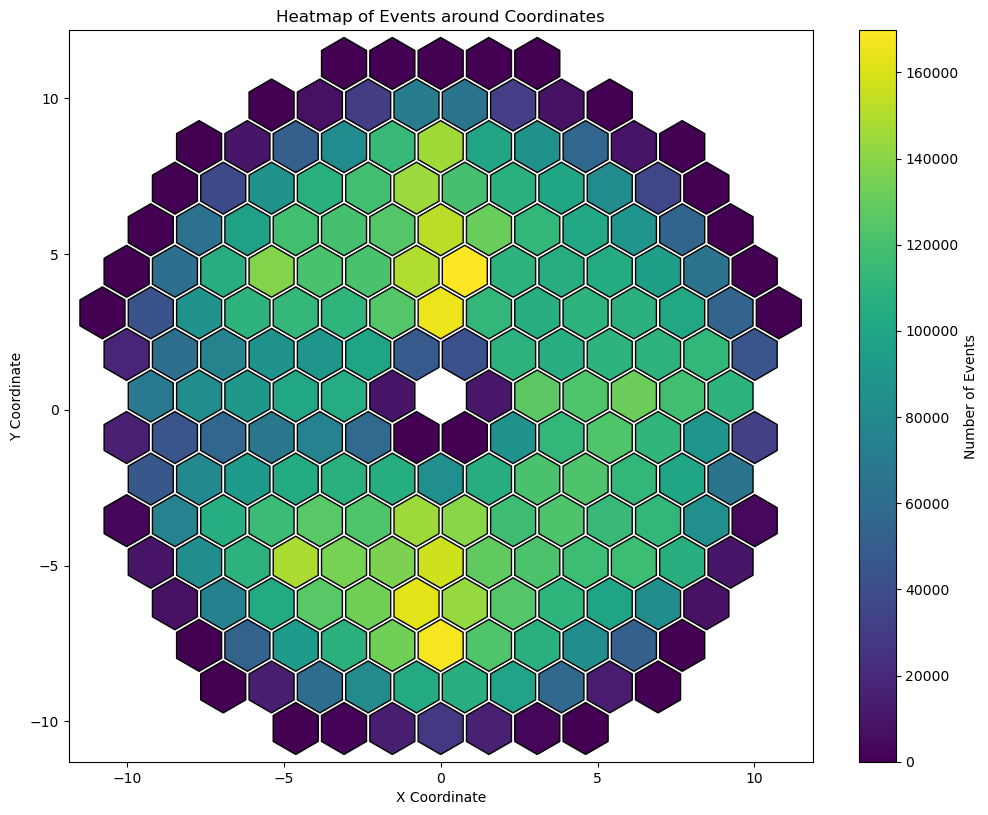

In [94]:
x, y = zip(*mirrors_centers)

# Create the scatter plot
plt.figure(figsize=(12, 9.5))
scatter = plt.scatter(x, y, c=mirror_numbers, cmap='viridis', s=1400, edgecolor='k', marker = 'h')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Events')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of Events around Coordinates')

# Show the plot
plt.show()